In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
big_df = pd.read_csv(r'D:\Graduation Project\QuadPlane Design\APC Propellers\PERFILES_WEB\all_props_cleaned_petite.csv')
big_df.head()

,V,Thrust,diameter,pitch,rpm
0,0.0,0.032,10.5,4.5,1000.0
1,0.2,0.032,10.5,4.5,1000.0
2,0.4,0.031,10.5,4.5,1000.0
3,0.7,0.031,10.5,4.5,1000.0
4,0.9,0.030,10.5,4.5,1000.0


In [3]:
import tensorflow as tf

In [4]:
dataset = big_df.copy()
dataset.tail()

,V,Thrust,diameter,pitch,rpm
293474,191.0,4.365,9.0,9.0,21000.0
293475,198.7,3.338,9.0,9.0,21000.0
293476,206.3,2.277,9.0,9.0,21000.0
293477,214.0,1.189,9.0,9.0,21000.0
293478,221.6,0.009,9.0,9.0,21000.0


In [5]:
dataset.isna().sum()

V           0
Thrust      1
diameter    0
pitch       0
rpm         0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isna().sum()

V           0
Thrust      0
diameter    0
pitch       0
rpm         0
dtype: int64

In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.tail()

,V,Thrust,diameter,pitch,rpm
128473,68.4,34.477,20.00,14.00,9000.0
216443,89.8,5.334,7.00,5.00,26000.0
153175,217.4,1.552,4.75,4.75,43000.0
101545,59.9,19.442,16.00,4.00,15000.0
207862,85.6,1.142,7.80,7.00,13000.0


In [9]:
train_labels = train_dataset.pop('Thrust')
test_labels = test_dataset.pop('Thrust')
train_dataset.head()

,V,diameter,pitch,rpm
112269,39.3,18.1,10.0,5000.0
201258,5.3,7.4,7.6,18000.0
185035,51.3,6.5,3.7,17000.0
129423,33.9,20.0,15.0,9000.0
13743,26.3,10.0,8.0,20000.0


In [10]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
V,234782.0,49.707743,45.637459,-42.0,13.6,36.20,73.8,319.6
diameter,234782.0,10.523603,4.487367,4.0,7.0,9.25,13.5,27.0
pitch,234782.0,7.308001,3.348207,2.0,4.5,6.50,10.0,22.5
rpm,234782.0,12508.699700,9050.014395,1000.0,6000.0,11000.00,17000.0,45000.0


In [11]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head()

,V,diameter,pitch,rpm
112269,-0.228053,1.688384,0.804012,-0.829689
201258,-0.973055,-0.696088,0.087211,0.606773
185035,0.034889,-0.896651,-1.077592,0.496275
129423,-0.346376,2.111795,2.297349,-0.387701
13743,-0.512906,-0.116684,0.206678,0.827767


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

W1018 12:06:05.895493  4668 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [13]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.08668348],
       [ 0.04207542],
       [-0.00070707],
       [ 0.10537666],
       [ 0.05664773],
       [ 0.02277268],
       [-0.05865517],
       [-0.04639457],
       [ 0.02377338],
       [ 0.00199432]], dtype=float32)

In [14]:
EPOCHS = 200
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1)

Train on 187825 samples, validate on 46957 samples
Epoch 1/200
187825/187825 [==============================] - 5s 28us/sample - loss: 3.8562 - mean_absolute_error: 0.9453 - mean_squared_error: 3.8562 - val_loss: 2.0257 - val_mean_absolute_error: 0.7957 - val_mean_squared_error: 2.0257
Epoch 2/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.7753 - mean_absolute_error: 0.6977 - mean_squared_error: 1.7753 - val_loss: 1.5419 - val_mean_absolute_error: 0.6208 - val_mean_squared_error: 1.54191.7959 - mean_absolute_er - ETA: 2s - loss: 1.7932 - mean_absolute_error: 0.7063 -  - ETA: 1s - loss: 1.7883 - mean_absolute_error: 0.7037 - mean_squared_error - ETA: 1s - loss: 1.8042 - mean_absolute_error: 0.7046 - me - ETA: 1s - loss: 1.8089 - mean_absolute_er
Epoch 3/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.6509 - mean_absolute_error: 0.6631 - mean_squared_error: 1.6509 - val_loss: 1.4897 - val_mean_absolute_error: 0.6295 - val_mean_

187825/187825 [==============================] - 5s 26us/sample - loss: 1.2474 - mean_absolute_error: 0.5646 - mean_squared_error: 1.2474 - val_loss: 1.3922 - val_mean_absolute_error: 0.5590 - val_mean_squared_error: 1.3922
Epoch 34/200
187825/187825 [==============================] - 5s 26us/sample - loss: 1.2516 - mean_absolute_error: 0.5643 - mean_squared_error: 1.2517 - val_loss: 1.3426 - val_mean_absolute_error: 0.5744 - val_mean_squared_error: 1.3426
Epoch 35/200
187825/187825 [==============================] - 6s 30us/sample - loss: 1.2378 - mean_absolute_error: 0.5632 - mean_squared_error: 1.2378 - val_loss: 1.2693 - val_mean_absolute_error: 0.5516 - val_mean_squared_error: 1.2693
Epoch 36/200
187825/187825 [==============================] - 6s 30us/sample - loss: 1.2420 - mean_absolute_error: 0.5628 - mean_squared_error: 1.2420 - val_loss: 1.2616 - val_mean_absolute_error: 0.5494 - val_mean_squared_error: 1.2616
Epoch 37/200
187825/187825 [==============================] - 6s 

187825/187825 [==============================] - 5s 27us/sample - loss: 1.1848 - mean_absolute_error: 0.5499 - mean_squared_error: 1.1848 - val_loss: 1.2513 - val_mean_absolute_error: 0.5746 - val_mean_squared_error: 1.25135500 - 
Epoch 68/200
187825/187825 [==============================] - 5s 28us/sample - loss: 1.1861 - mean_absolute_error: 0.5508 - mean_squared_error: 1.1861 - val_loss: 1.3065 - val_mean_absolute_error: 0.5888 - val_mean_squared_error: 1.3065
Epoch 69/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.1872 - mean_absolute_error: 0.5515 - mean_squared_error: 1.1872 - val_loss: 1.2476 - val_mean_absolute_error: 0.5915 - val_mean_squared_error: 1.2476rro
Epoch 70/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.1922 - mean_absolute_error: 0.5538 - mean_squared_error: 1.1922 - val_loss: 1.2964 - val_mean_absolute_error: 0.5624 - val_mean_squared_error: 1.2964
Epoch 71/200
187825/187825 [===========================

Epoch 101/200
187825/187825 [==============================] - 5s 28us/sample - loss: 1.1365 - mean_absolute_error: 0.5406 - mean_squared_error: 1.1365 - val_loss: 1.2178 - val_mean_absolute_error: 0.5460 - val_mean_squared_error: 1.2178
Epoch 102/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.1301 - mean_absolute_error: 0.5409 - mean_squared_error: 1.1301 - val_loss: 1.1926 - val_mean_absolute_error: 0.5526 - val_mean_squared_error: 1.1926
Epoch 103/200
187825/187825 [==============================] - 5s 28us/sample - loss: 1.1394 - mean_absolute_error: 0.5403 - mean_squared_error: 1.1394 - val_loss: 1.5180 - val_mean_absolute_error: 0.7762 - val_mean_squared_error: 1.5180
Epoch 104/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.1349 - mean_absolute_error: 0.5403 - mean_squared_error: 1.1349 - val_loss: 1.2240 - val_mean_absolute_error: 0.5544 - val_mean_squared_error: 1.2240
Epoch 105/200
187825/187825 [===================

187825/187825 [==============================] - 5s 27us/sample - loss: 1.1035 - mean_absolute_error: 0.5254 - mean_squared_error: 1.1035 - val_loss: 1.2019 - val_mean_absolute_error: 0.5222 - val_mean_squared_error: 1.2019
Epoch 136/200
187825/187825 [==============================] - 5s 29us/sample - loss: 1.1004 - mean_absolute_error: 0.5248 - mean_squared_error: 1.1004 - val_loss: 1.2802 - val_mean_absolute_error: 0.5855 - val_mean_squared_error: 1.2802
Epoch 137/200
187825/187825 [==============================] - 5s 29us/sample - loss: 1.0965 - mean_absolute_error: 0.5247 - mean_squared_error: 1.0965 - val_loss: 1.1866 - val_mean_absolute_error: 0.5495 - val_mean_squared_error: 1.1866
Epoch 138/200
187825/187825 [==============================] - 5s 29us/sample - loss: 1.0959 - mean_absolute_error: 0.5234 - mean_squared_error: 1.0959 - val_loss: 1.3036 - val_mean_absolute_error: 0.6007 - val_mean_squared_error: 1.3036
Epoch 139/200
187825/187825 [==============================] -

187825/187825 [==============================] - 5s 27us/sample - loss: 1.0718 - mean_absolute_error: 0.5165 - mean_squared_error: 1.0718 - val_loss: 1.2559 - val_mean_absolute_error: 0.5461 - val_mean_squared_error: 1.2559
Epoch 169/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.0707 - mean_absolute_error: 0.5154 - mean_squared_error: 1.0707 - val_loss: 1.4459 - val_mean_absolute_error: 0.6275 - val_mean_squared_error: 1.4459solute_error: 0 - ETA: 
Epoch 170/200
187825/187825 [==============================] - 5s 28us/sample - loss: 1.0651 - mean_absolute_error: 0.5159 - mean_squared_error: 1.0651 - val_loss: 1.2242 - val_mean_absolute_error: 0.5267 - val_mean_squared_error: 1.2242
Epoch 171/200
187825/187825 [==============================] - 5s 27us/sample - loss: 1.0703 - mean_absolute_error: 0.5162 - mean_squared_error: 1.0703 - val_loss: 1.2865 - val_mean_absolute_error: 0.5896 - val_mean_squared_error: 1.2865
Epoch 172/200
187825/187825 [==========

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
195,1.056258,0.520117,1.056258,1.240400,0.605947,1.240400,195
196,1.055803,0.519699,1.055804,1.211748,0.519995,1.211748,196
197,1.058608,0.521236,1.058606,1.131593,0.574581,1.131595,197
198,1.058322,0.520324,1.058322,1.156980,0.526533,1.156979,198
199,1.060707,0.521417,1.060709,1.137483,0.511869,1.137483,199


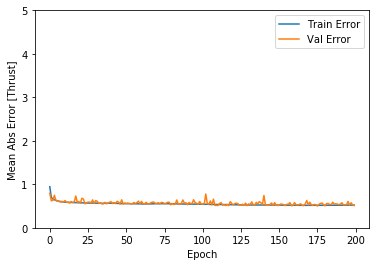

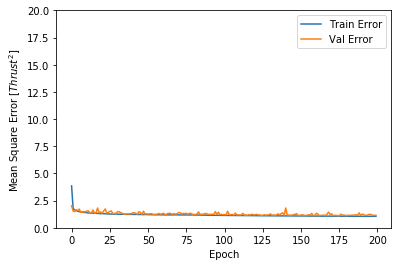

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Thrust]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Thrust^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

In [17]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} Thrust".format(mae))

58696/58696 - 1s - loss: 1.1043 - mean_absolute_error: 0.5061 - mean_squared_error: 1.1043
Testing set Mean Abs Error:  0.51 Thrust


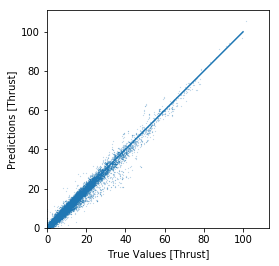

In [42]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions, s=0.01)
plt.xlabel('True Values [Thrust]')
plt.ylabel('Predictions [Thrust]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
# plt.xlim([0,0.5])
# plt.ylim([0,0.5])
_ = plt.plot([-100, 100], [-100, 100])

####  Error Distribution

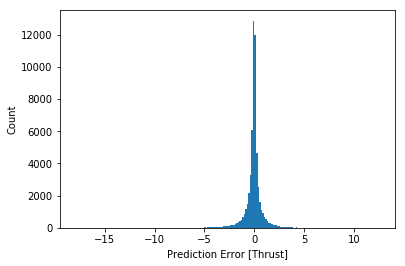

In [40]:
error = test_predictions - test_labels
plt.hist(error, bins = 200)
plt.xlabel("Prediction Error [Thrust]")
_ = plt.ylabel("Count")

## <center>Some Test Cases</center>

In [20]:
input_df = pd.DataFrame([14.3,10.5,4.5,3000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 0.096

(234782, 4)
      V  diameter  pitch     rpm
0  14.3      10.5    4.5  3000.0
          V  diameter     pitch       rpm
0 -0.775848  -0.00526 -0.838658 -1.050683


array([[0.25227046]], dtype=float32)

In [32]:
input_df = pd.DataFrame([27.6,5.5,4.5,37000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 5.112

(234782, 4)
      V  diameter  pitch      rpm
0  27.6       5.5    4.5  37000.0
          V  diameter     pitch       rpm
0 -0.484421 -1.119499 -0.838658  2.706217


array([[5.962059]], dtype=float32)

In [41]:
input_df = pd.DataFrame([54.1,8.5,7,13000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 2.442

      V  diameter  pitch      rpm
0  54.1       8.5    7.0  13000.0
          V  diameter    pitch       rpm
0  0.096242 -0.450955 -0.09199  0.054287


array([[2.3014643]], dtype=float32)

In [43]:
input_df = pd.DataFrame([20.1,11,7,6000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 1.558

      V  diameter  pitch     rpm
0  20.1      11.0    7.0  6000.0
         V  diameter    pitch       rpm
0 -0.64876  0.106164 -0.09199 -0.719192


array([[1.8186501]], dtype=float32)

## <center>GUI</center>

multiple props


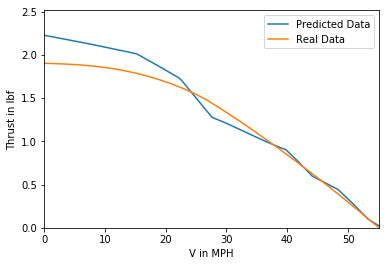

In [49]:
diam = 11
pitch = 7
rpm = 6000
V_values = list(np.linspace(0,100,num=500))

# Predicted Data:
T_values = []
for V_value in V_values:
    input_df = pd.DataFrame([V_value,diam,pitch,rpm]).T
    input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
#     print(input_df)
#     print(norm(input_df))
    T_values.append(model.predict(norm(input_df))[0][0])
    
plt.plot(V_values, T_values, label='Predicted Data')

# Real Data:
prop_df = dataset.loc[dataset['diameter'] == diam].loc[dataset['pitch'] == pitch].loc[dataset['rpm'] == rpm]
if prop_df.shape[0] > 3:    # prop is available in the dataset
    print('Prop is available in dataset')
    if prop_df.loc[prop_df['V'] == 0].index.shape[0] > 1:    # if there are multiple similar props
        V_real = prop_df['V'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        T_real = prop_df['Thrust'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        print('multiple props')
    else:    # Only one prop
        V_real = prop_df['V']
        T_real = prop_df['Thrust']
        print('only one prop')

    plt.plot(V_real, T_real, label='Real Data')
    plt.xlim([0,V_real.iloc[-1]])
else:
    print('Prop not available in dataset')


plt.ylim([0,plt.ylim()[1]])
plt.xlabel('V in MPH')
plt.ylabel('Thrust in lbf')
plt.legend()
plt.show()

In [50]:
model.save('Fitting_model.h5')